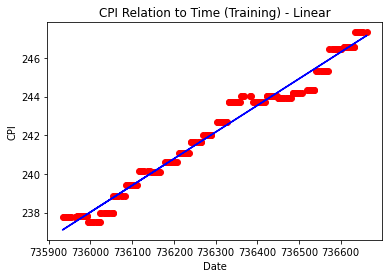

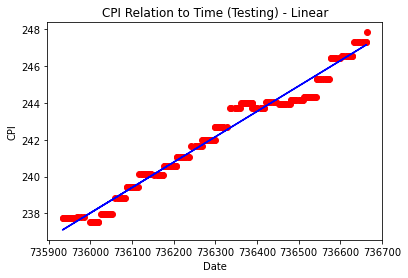

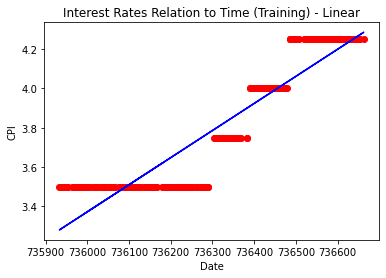

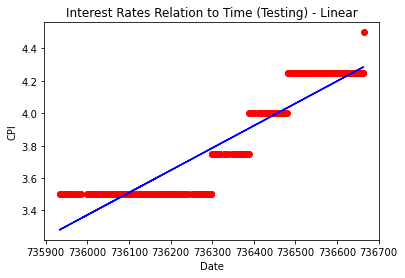

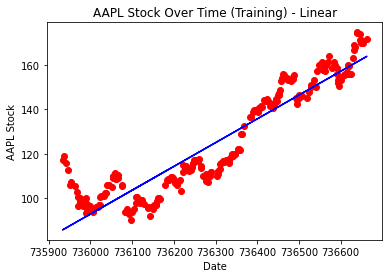

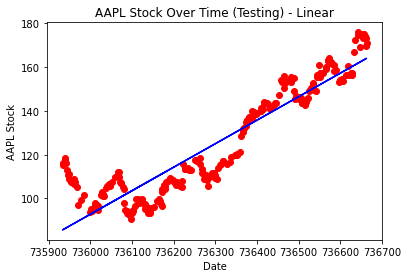

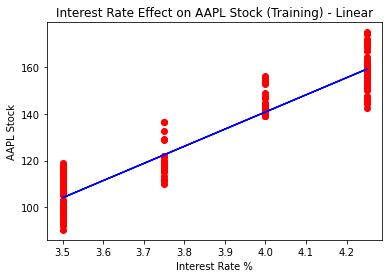

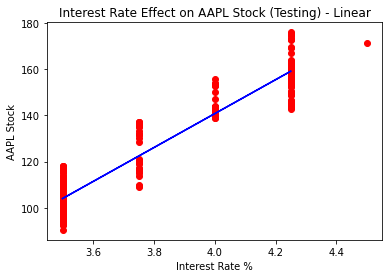

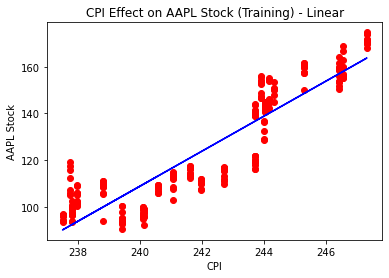

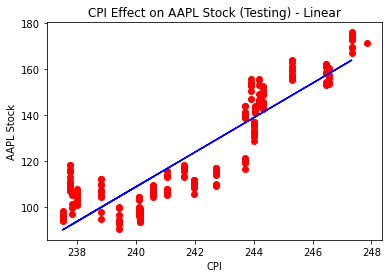

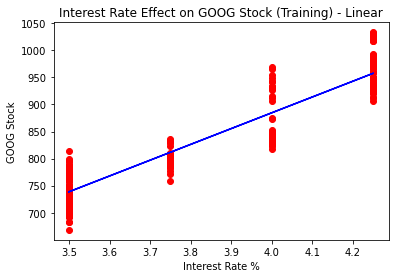

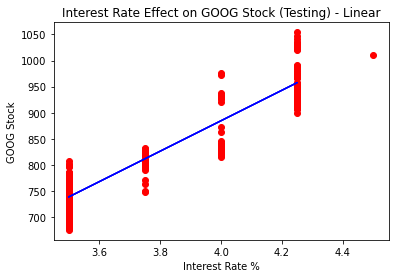

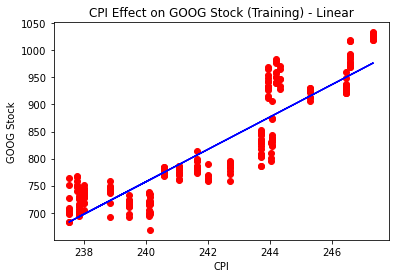

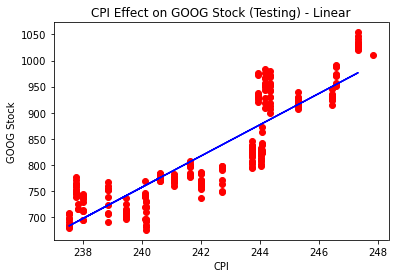

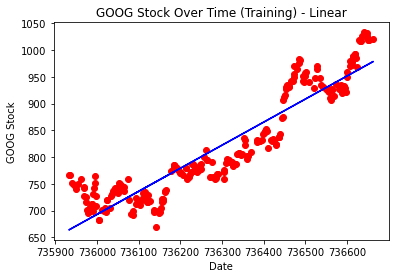

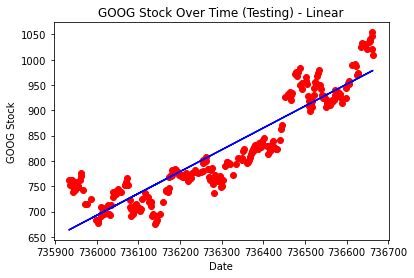

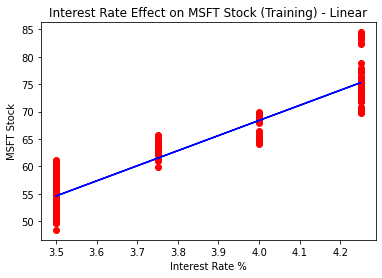

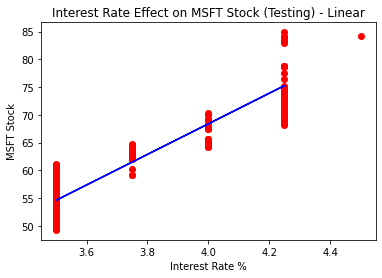

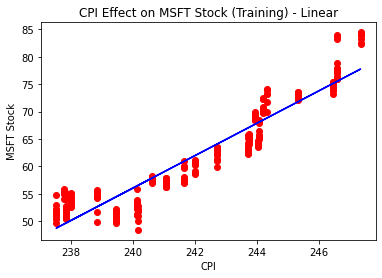

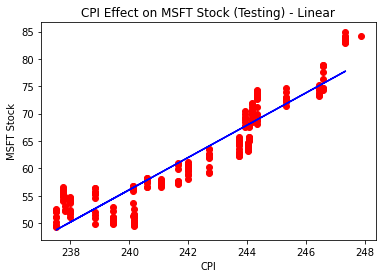

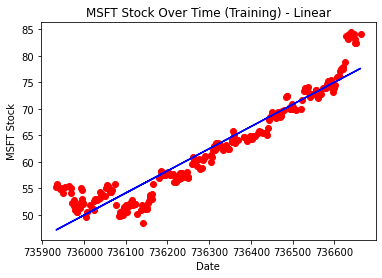

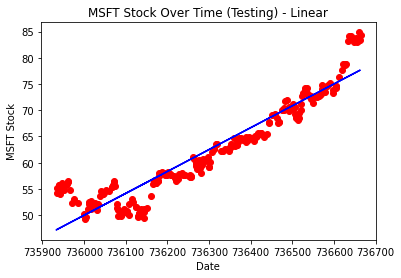

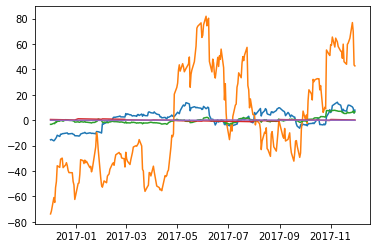

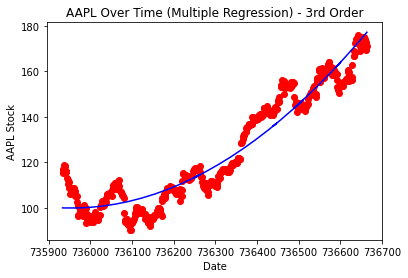

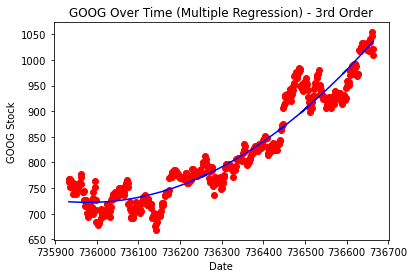

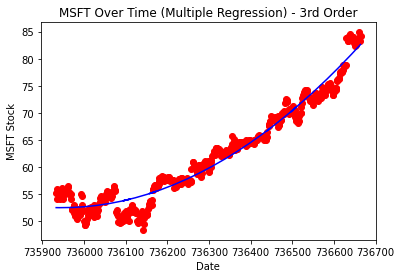

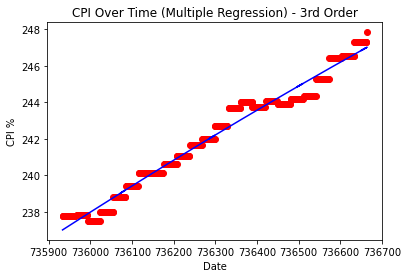

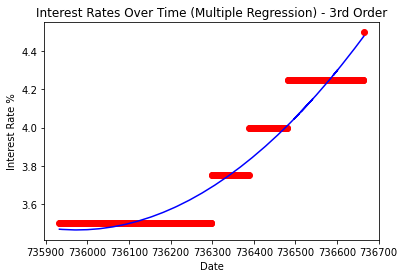

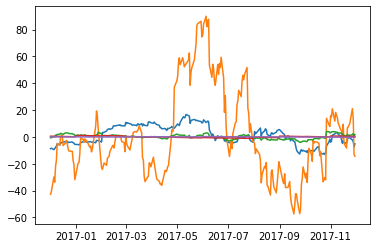

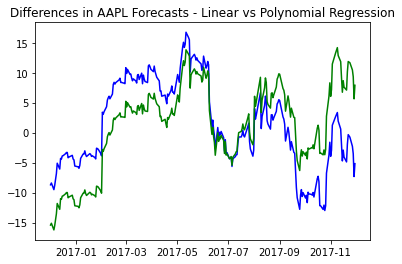

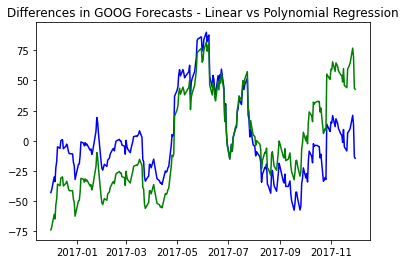

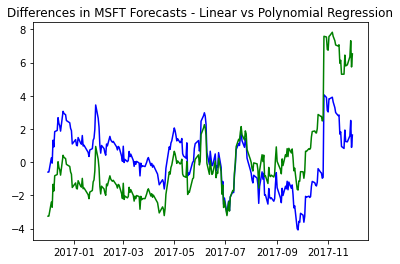

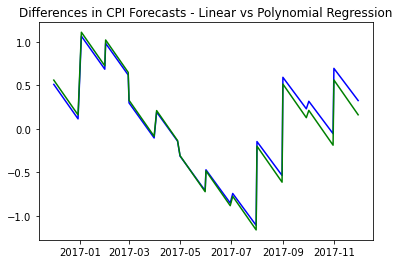

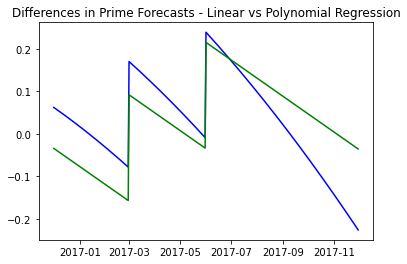

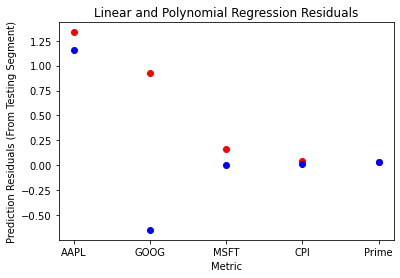

Mean Squared Errors of Linear Regression Model:
AAPL: 51.873566969122805
GOOG: 1555.3670348029925
MSFT: 6.25047541427316
CPI: 0.3198736729498507
Prime: 0.009825248582029506
Mean Squared Errors of Polynomial Regression Model:
AAPL: 53.82890326307432
GOOG: 1057.8596137128013
MSFT: 2.874192833456942
CPI: 0.308571936679649
Prime: 0.012312517021585511


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sqlalchemy as sal
from sqlalchemy import create_engine
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error



conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-5FUOVAJ\SQLEXPRESSEX;'
                      'Database=DAT490;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

dataset = pd.read_sql_query('SELECT * FROM bi.StartUpAnalysis',conn)

dataset['Date'] = pd.to_datetime(dataset['Date'], format="%Y-%m-%d")
dataset['Date'] = dataset['Date'].map(datetime.datetime.toordinal)

engine = sal.create_engine('mssql+pyodbc://DESKTOP-5FUOVAJ\SQLEXPRESSEX/DAT490?driver=SQL Server?Trusted_Connection=yes')
connection = engine.connect()



#####################################################
# CREATE ARRAYS FOR FITTING
#######################################################
X = dataset['Date']
X = np.array(X)
X = X.reshape(-1,1)

Y_CPI = dataset['CPIAUCSL']
Y_CPI = np.array(Y_CPI)
Y_CPI = Y_CPI.reshape(-1,1)

Y_Prime = dataset['PRIME']
Y_Prime = np.array(Y_Prime)
Y_Prime = Y_Prime.reshape(-1,1)

XPrime = dataset['PRIME']#.values #get a copy of dataset exclude last column
XPrime = np.array(XPrime)
XPrime = XPrime.reshape(-1,1)

XCPI = dataset['CPIAUCSL']#.values
XCPI = np.array(XCPI)
XCPI = XCPI.reshape(-1,1)

yAAPL = dataset['AAPL']#.values #get array of dataset in column 1st
yAAPL = np.array(yAAPL)
yAAPL = yAAPL.reshape(-1,1)

yGOOG = dataset['GOOG']#.values
yGOOG = np.array(yGOOG)
yGOOG = yGOOG.reshape(-1,1)

yMSFT = dataset['MSFT']#.values
yMSFT = np.array(yMSFT)
yMSFT = yMSFT.reshape(-1,1)
############################################################



##########################################################
# CREATE TRAINING AND TESTING VARIABLES
############################################################
X_trainCPI, X_testCPI, Y_CPI_train, Y_CPI_test = train_test_split(X, Y_CPI, test_size=1/2,random_state=0)
X_trainPrime, X_testPrime, Y_Prime_train, Y_Prime_test = train_test_split(X,Y_Prime,test_size=1/2,random_state=0)

X_trainAAPL, X_testAAPL, Y_AAPL_train, Y_AAPL_test = train_test_split(X, yAAPL, test_size=1/2, random_state=0)
X_trainGOOG, X_testGOOG, Y_GOOG_train, Y_GOOG_test = train_test_split(X, yGOOG, test_size=1/2, random_state=0)
X_trainMSFT, X_testMSFT, Y_MSFT_train, Y_MSFT_test = train_test_split(X, yMSFT, test_size=1/2, random_state=0)

XPrime_trainAAPL, XPrime_testAAPL, yAAPL_trainPrime, yAAPL_testPrime = train_test_split(XPrime, yAAPL, test_size=1/2, random_state=0)
XPrime_trainGOOG, XPrime_testGOOG, yGOOG_trainPrime, yGOOG_testPrime = train_test_split(XPrime, yGOOG, test_size=1/2, random_state=0)
XPrime_trainMSFT, XPrime_testMSFT, yMSFT_trainPrime, yMSFT_testPrime = train_test_split(XPrime, yMSFT, test_size=1/2, random_state=0)

XCPI_trainAAPL, XCPI_testAAPL, yAAPL_trainCPI, yAAPL_testCPI = train_test_split(XCPI, yAAPL, test_size=1/2, random_state=0)
XCPI_trainGOOG, XCPI_testGOOG, yGOOG_trainCPI, yGOOG_testCPI = train_test_split(XCPI, yGOOG, test_size=1/2, random_state=0)
XCPI_trainMSFT, XCPI_testMSFT, yMSFT_trainCPI, yMSFT_testCPI = train_test_split(XCPI, yMSFT, test_size=1/2, random_state=0)
####################################################################


###############################################################
# CREATE REGRESSION VARIABLES
regressorAAPL = LinearRegression()
regressorAAPL.fit(X_trainAAPL, Y_AAPL_train)

regressorGOOG = LinearRegression()
regressorGOOG.fit(X_trainGOOG, Y_GOOG_train)

regressorMSFT = LinearRegression()
regressorMSFT.fit(X_trainMSFT, Y_MSFT_train)

regressorPrime = LinearRegression()
regressorPrime.fit(X_trainPrime, Y_Prime_train)

regressorCPI = LinearRegression()
regressorCPI.fit(X_trainCPI,Y_CPI_train)

regressorPrimeAAPL = LinearRegression()
regressorPrimeAAPL.fit(XPrime_trainAAPL, yAAPL_trainPrime)

regressorPrimeGOOG = LinearRegression()
regressorPrimeGOOG.fit(XPrime_trainGOOG, yGOOG_trainPrime)

regressorPrimeMSFT = LinearRegression()
regressorPrimeMSFT.fit(XPrime_trainMSFT, yMSFT_trainPrime)

regressorCPIAAPL = LinearRegression()
regressorCPIAAPL.fit(XCPI_trainAAPL, yAAPL_trainCPI)

regressorCPIGOOG = LinearRegression()
regressorCPIGOOG.fit(XCPI_trainGOOG, yGOOG_trainCPI)

regressorCPIMSFT = LinearRegression()
regressorCPIMSFT.fit(XCPI_trainMSFT, yMSFT_trainCPI)

###############################################


#####################################################################
#####################################################################
# VISUALIZE INITIAL RELATIONSHIPS
######################################################################
######################################################################


##########################
# CPI OVER TIME
###############################
# Visualizing the Training set results (CPI)
viz_train = plt
viz_train.scatter(X_trainCPI, Y_CPI_train, color='red')
viz_train.plot(X_trainCPI, regressorCPI.predict(X_trainCPI), color='blue')
viz_train.title('CPI Relation to Time (Training) - Linear')
viz_train.xlabel('Date')
viz_train.ylabel('CPI')
viz_train.show()

# Visualizing the Test set results (CPI)
viz_test = plt
viz_test.scatter(X_testCPI, Y_CPI_test, color='red')
viz_test.plot(X_trainCPI, regressorCPI.predict(X_trainCPI), color='blue')
viz_test.title('CPI Relation to Time (Testing) - Linear')
viz_test.xlabel('Date')
viz_test.ylabel('CPI')
viz_test.show()


############################################
# PRIME OVER TIME
##########################################

# Visualizing the Training set results (Prime)
viz_train = plt
viz_train.scatter(X_trainPrime, Y_Prime_train, color='red')
viz_train.plot(X_trainPrime, regressorPrime.predict(X_trainPrime), color='blue')
viz_train.title('Interest Rates Relation to Time (Training) - Linear')
viz_train.xlabel('Date')
viz_train.ylabel('CPI')
viz_train.show()

# Visualizing the Test set results (Prime)
viz_test = plt
viz_test.scatter(X_testPrime, Y_Prime_test, color='red')
viz_test.plot(X_trainPrime, regressorPrime.predict(X_trainPrime), color='blue')
viz_test.title('Interest Rates Relation to Time (Testing) - Linear')
viz_test.xlabel('Date')
viz_test.ylabel('CPI')
viz_test.show()


###################################################
# AAPL STOCK MODELS
##################################################

# Visualizing the Training set results (AAPL)
viz_train = plt
viz_train.scatter(X_trainAAPL, Y_AAPL_train, color='red')
viz_train.plot(X_trainAAPL, regressorAAPL.predict(X_trainAAPL), color='blue')
viz_train.title('AAPL Stock Over Time (Training) - Linear')
viz_train.xlabel('Date')
viz_train.ylabel('AAPL Stock')
viz_train.show()

# Visualizing the Test set results (AAPL)
viz_test = plt
viz_test.scatter(X_testAAPL, Y_AAPL_test, color='red')
viz_test.plot(X_trainAAPL, regressorAAPL.predict(X_trainAAPL), color='blue')
viz_test.title('AAPL Stock Over Time (Testing) - Linear')
viz_test.xlabel('Date')
viz_test.ylabel('AAPL Stock')
viz_test.show()


# Visualizing the Training set results (AAPL_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainAAPL, yAAPL_trainPrime, color='red')
viz_train.plot(XPrime_trainAAPL, regressorPrimeAAPL.predict(XPrime_trainAAPL), color='blue')
viz_train.title('Interest Rate Effect on AAPL Stock (Training) - Linear')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('AAPL Stock')
viz_train.show()

# Visualizing the Test set results (AAPL_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testAAPL, yAAPL_testPrime, color='red')
viz_test.plot(XPrime_trainAAPL, regressorPrimeAAPL.predict(XPrime_trainAAPL), color='blue')
viz_test.title('Interest Rate Effect on AAPL Stock (Testing) - Linear')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('AAPL Stock')
viz_test.show()

# Visualizing the Training set results (AAPL_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainAAPL, yAAPL_trainCPI, color='red')
viz_train.plot(XCPI_trainAAPL, regressorCPIAAPL.predict(XCPI_trainAAPL), color='blue')
viz_train.title('CPI Effect on AAPL Stock (Training) - Linear')
viz_train.xlabel('CPI')
viz_train.ylabel('AAPL Stock')
viz_train.show()


# Visualizing the Test set results (AAPL_CPI)
viz_test = plt
viz_test.scatter(XCPI_testAAPL, yAAPL_testCPI, color='red')
viz_test.plot(XCPI_trainAAPL, regressorCPIAAPL.predict(XCPI_trainAAPL), color='blue')
viz_test.title('CPI Effect on AAPL Stock (Testing) - Linear')
viz_test.xlabel('CPI')
viz_test.ylabel('AAPL Stock')
viz_test.show()


##############################################
#   GOOG STOCK MODELS
##############################################


# Visualizing the Training set results (GOOG_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainGOOG, yGOOG_trainPrime, color='red')
viz_train.plot(XPrime_trainGOOG, regressorPrimeGOOG.predict(XPrime_trainGOOG), color='blue')
viz_train.title('Interest Rate Effect on GOOG Stock (Training) - Linear')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('GOOG Stock')
viz_train.show()

# Visualizing the Test set results (GOOG_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testGOOG, yGOOG_testPrime, color='red')
viz_test.plot(XPrime_trainGOOG, regressorPrimeGOOG.predict(XPrime_trainGOOG), color='blue')
viz_test.title('Interest Rate Effect on GOOG Stock (Testing) - Linear')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('GOOG Stock')
viz_test.show()

# Visualizing the Training set results (GOOG_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainGOOG, yGOOG_trainCPI, color='red')
viz_train.plot(XCPI_trainGOOG, regressorCPIGOOG.predict(XCPI_trainGOOG), color='blue')
viz_train.title('CPI Effect on GOOG Stock (Training) - Linear')
viz_train.xlabel('CPI')
viz_train.ylabel('GOOG Stock')
viz_train.show()


# Visualizing the Test set results (GOOG_CPI)
viz_test = plt
viz_test.scatter(XCPI_testGOOG, yGOOG_testCPI, color='red')
viz_test.plot(XCPI_trainGOOG, regressorCPIGOOG.predict(XCPI_trainGOOG), color='blue')
viz_test.title('CPI Effect on GOOG Stock (Testing) - Linear')
viz_test.xlabel('CPI')
viz_test.ylabel('GOOG Stock')
viz_test.show()

# Visualizing the Training set results (GOOG)
viz_train = plt
viz_train.scatter(X_trainGOOG, Y_GOOG_train, color='red')
viz_train.plot(X_trainGOOG, regressorGOOG.predict(X_trainGOOG), color='blue')
viz_train.title('GOOG Stock Over Time (Training) - Linear')
viz_train.xlabel('Date')
viz_train.ylabel('GOOG Stock')
viz_train.show()

# Visualizing the Test set results (GOOG)
viz_test = plt
viz_test.scatter(X_testGOOG, Y_GOOG_test, color='red')
viz_test.plot(X_trainGOOG, regressorGOOG.predict(X_trainGOOG), color='blue')
viz_test.title('GOOG Stock Over Time (Testing) - Linear')
viz_test.xlabel('Date')
viz_test.ylabel('GOOG Stock')
viz_test.show()


#############################################
#     MSFT STOCK MODELS
##############################################

# Visualizing the Training set results (MSFT_PRIME)
viz_train = plt
viz_train.scatter(XPrime_trainMSFT, yMSFT_trainPrime, color='red')
viz_train.plot(XPrime_trainMSFT, regressorPrimeMSFT.predict(XPrime_trainMSFT), color='blue')
viz_train.title('Interest Rate Effect on MSFT Stock (Training) - Linear')
viz_train.xlabel('Interest Rate %')
viz_train.ylabel('MSFT Stock')
viz_train.show()

# Visualizing the Test set results (MSFT_PRIME)
viz_test = plt
viz_test.scatter(XPrime_testMSFT, yMSFT_testPrime, color='red')
viz_test.plot(XPrime_trainMSFT, regressorPrimeMSFT.predict(XPrime_trainMSFT), color='blue')
viz_test.title('Interest Rate Effect on MSFT Stock (Testing) - Linear')
viz_test.xlabel('Interest Rate %')
viz_test.ylabel('MSFT Stock')
viz_test.show()

# Visualizing the Training set results (MSFT_CPI)
viz_train = plt
viz_train.scatter(XCPI_trainMSFT, yMSFT_trainCPI, color='red')
viz_train.plot(XCPI_trainMSFT, regressorCPIMSFT.predict(XCPI_trainMSFT), color='blue')
viz_train.title('CPI Effect on MSFT Stock (Training) - Linear')
viz_train.xlabel('CPI')
viz_train.ylabel('MSFT Stock')
viz_train.show()


# Visualizing the Test set results (MSFT_CPI)
viz_test = plt
viz_test.scatter(XCPI_testMSFT, yMSFT_testCPI, color='red')
viz_test.plot(XCPI_trainMSFT, regressorCPIMSFT.predict(XCPI_trainMSFT), color='blue')
viz_test.title('CPI Effect on MSFT Stock (Testing) - Linear')
viz_test.xlabel('CPI')
viz_test.ylabel('MSFT Stock')
viz_test.show()

# Visualizing the Training set results (MSFT)
viz_train = plt
viz_train.scatter(X_trainMSFT, Y_MSFT_train, color='red')
viz_train.plot(X_trainMSFT, regressorMSFT.predict(X_trainMSFT), color='blue')
viz_train.title('MSFT Stock Over Time (Training) - Linear')
viz_train.xlabel('Date')
viz_train.ylabel('MSFT Stock')
viz_train.show()

# Visualizing the Test set results (MSFT)
viz_test = plt
viz_test.scatter(X_testMSFT, Y_MSFT_test, color='red')
viz_test.plot(X_trainMSFT, regressorMSFT.predict(X_trainMSFT), color='blue')
viz_test.title('MSFT Stock Over Time (Testing) - Linear')
viz_test.xlabel('Date')
viz_test.ylabel('MSFT Stock')
viz_test.show()
#######################################################################################
#######################################################################################


df = dataset

# create an array of 90 dates starting at '2017-12-01', one per day (FOR FORECASTS)
rng = pd.date_range('2017-12-01', periods=90, freq='D')
linearForecasts = pd.DataFrame({ 'Date': rng})
linearForecasts['Date'] = pd.to_datetime(linearForecasts['Date'], format="%Y-%m-%d")
linearForecasts['Date'] = linearForecasts['Date'].map(datetime.datetime.toordinal)

# create an array of second segment dates from '2016-11-16' to '2017-12-01' (FOR VALIDATION)
rng = pd.date_range('2016-11-16', periods=380, freq='D')
linearTest = pd.DataFrame({ 'Date': rng})
linearTest['Date'] = pd.to_datetime(linearTest['Date'], format="%Y-%m-%d")
linearTest['Date'] = linearTest['Date'].map(datetime.datetime.toordinal)


##############################################################
# VALIDATE LINEAR MODEL
############################################################
y_VCPI = regressorCPI.predict(linearTest)
y_VPrime = regressorPrime.predict(linearTest)

y_VAAPL = regressorAAPL.predict(linearTest)
y_VGOOG = regressorGOOG.predict(linearTest)
y_VMSFT = regressorMSFT.predict(linearTest)
##############################################################

###########################################################
# CREATE VALIDATION TABLE
########################################################

linearTest['CPI_Validation'] = pd.DataFrame(data = y_VCPI)
linearTest['Prime_Validation'] = pd.DataFrame(data = y_VPrime)

linearTest['AAPL_Validation'] = pd.DataFrame(data = y_VAAPL)
linearTest['GOOG_Validation'] = pd.DataFrame(data = y_VGOOG)
linearTest['MSFT_Validation'] = pd.DataFrame(data = y_VMSFT)

linearTest['Date'] = linearTest['Date'].map(datetime.datetime.fromordinal)
linearTest.to_sql(name = 'LinearModelTest', con = connection, if_exists = 'replace', index = False)

##################################################################



########################################
# CREATE PREDICTIONS
########################################
y_predCPI = regressorCPI.predict(linearForecasts)
y_predPrime = regressorPrime.predict(linearForecasts)

y_predAAPL = regressorAAPL.predict(linearForecasts)
y_predGOOG = regressorGOOG.predict(linearForecasts)
y_predMSFT = regressorMSFT.predict(linearForecasts)



##################################################################


#################################################################
# CREATE PREDICTIONS TABLE
################################################################

linearForecasts['CPI_Pred'] = pd.DataFrame(data = y_predCPI)
linearForecasts['Prime_Pred'] = pd.DataFrame(data = y_predPrime)

linearForecasts['AAPL_Pred'] = pd.DataFrame(data = y_predAAPL)
linearForecasts['GOOG_Pred'] = pd.DataFrame(data = y_predGOOG)
linearForecasts['MSFT_Pred'] = pd.DataFrame(data = y_predMSFT)


linearForecasts['Date'] = linearForecasts['Date'].map(datetime.datetime.fromordinal)
linearForecasts.to_sql(name = 'LinearForecasts', con = connection, if_exists = 'replace', index = False)

#############################################################################



###################################
# PLOT DIFFERENCES FROM VALIDATION
####################################

validation = pd.read_sql_query('SELECT * FROM bi.LinearValidation',conn)

viz_valid = plt
viz_valid.plot(validation['Date'], validation['AAPL_DIFF'],label='AAPL Diff')
viz_valid.plot(validation['Date'],validation['GOOG_DIFF'],label='GOOG Diff')
viz_valid.plot(validation['Date'],validation['MSFT_DIFF'],label='MSFT Diff')
viz_valid.plot(validation['Date'],validation['CPI_DIFF'],label='CPI Diff')
viz_valid.plot(validation['Date'],validation['Prime_DIFF'],label='Prime Diff')
viz_valid.show()


#############################################



##########################################################
# BEGIN POLYNOMIAL REGRESSION (POST VALIDATION)
##########################################################

#####################################################
# ORIGINAL ARRAYS FOR FITTING
#######################################################
#X = dataset['Date']
#X = np.array(X)
#X = X.reshape(-1,1)

#Y_CPI = dataset['CPIAUCSL']
#Y_CPI = np.array(Y_CPI)
#Y_CPI = Y_CPI.reshape(-1,1)

#Y_Prime = dataset['PRIME']
#Y_Prime = np.array(Y_Prime)
#Y_Prime = Y_Prime.reshape(-1,1)

#XPrime = dataset['PRIME']#.values #get a copy of dataset exclude last column
#XPrime = np.array(XPrime)
#XPrime = XPrime.reshape(-1,1)

#XCPI = dataset['CPIAUCSL']#.values
#XCPI = np.array(XCPI)
#XCPI = XCPI.reshape(-1,1)

#yAAPL = dataset['AAPL']#.values #get array of dataset in column 1st
#yAAPL = np.array(yAAPL)
#yAAPL = yAAPL.reshape(-1,1)

#yGOOG = dataset['GOOG']#.values
#yGOOG = np.array(yGOOG)
#yGOOG = yGOOG.reshape(-1,1)

#yMSFT = dataset['MSFT']#.values
#yMSFT = np.array(yMSFT)
#yMSFT = yMSFT.reshape(-1,1)
############################################################

# create an array of second segment dates from '2016-11-16' to '2017-12-01' (FOR VALIDATION)
rngPT = pd.date_range('2016-11-16', periods=380, freq='D')
polyTest = pd.DataFrame({ 'Date': rngPT})
polyTest['Date'] = pd.to_datetime(polyTest['Date'], format="%Y-%m-%d")
polyTest['Date'] = polyTest['Date'].map(datetime.datetime.toordinal)

# create an array of 90 dates starting at '2017-12-01', one per day (FOR FORECASTS)
rngP = pd.date_range('2017-12-01', periods=90, freq='D')
polyForecasts = pd.DataFrame({ 'Date': rngP})
polyForecasts['Date'] = pd.to_datetime(polyForecasts['Date'], format="%Y-%m-%d")
polyForecasts['Date'] = polyForecasts['Date'].map(datetime.datetime.toordinal)


################################################
## CREATE POLY VARIABLES
################################################

poly_regAAPL = PolynomialFeatures(degree=3)
X_polyAAPL = poly_regAAPL.fit_transform(X)

poly_regGOOG = PolynomialFeatures(degree=3)
X_polyGOOG = poly_regGOOG.fit_transform(X)

poly_regMSFT = PolynomialFeatures(degree=3)
X_polyMSFT = poly_regMSFT.fit_transform(X)

poly_regCPI = PolynomialFeatures(degree=3)
X_polyCPI = poly_regCPI.fit_transform(X)

poly_regPrime = PolynomialFeatures(degree=3)
X_polyPrime = poly_regPrime.fit_transform(X)


pol_regAAPL = LinearRegression()
pol_regAAPL.fit(X_polyAAPL, yAAPL)

pol_regGOOG = LinearRegression()
pol_regGOOG.fit(X_polyGOOG, yGOOG)

pol_regMSFT = LinearRegression()
pol_regMSFT.fit(X_polyMSFT, yMSFT)

pol_regCPI = LinearRegression()
pol_regCPI.fit(X_polyCPI, Y_CPI)

pol_regPrime = LinearRegression()
pol_regPrime.fit(X_polyPrime, Y_Prime)
#####################################################################


##################################################################
# VISUALIZE POLYNOMIAL REGRESSION RESULTS
###################################################################

# AAPL
def viz_polymonial():
    plt.scatter(X, yAAPL, color='red')
    plt.plot(X, pol_regAAPL.predict(poly_regAAPL.fit_transform(X)), color='blue')
    plt.title('AAPL Over Time (Multiple Regression) - 3rd Order')
    plt.xlabel('Date')
    plt.ylabel('AAPL Stock')
    plt.show()
    return
viz_polymonial()

# GOOG
def viz_polymonial():
    plt.scatter(X, yGOOG, color='red')
    plt.plot(X, pol_regGOOG.predict(poly_regGOOG.fit_transform(X)), color='blue')
    plt.title('GOOG Over Time (Multiple Regression) - 3rd Order')
    plt.xlabel('Date')
    plt.ylabel('GOOG Stock')
    plt.show()
    return
viz_polymonial()

# MSFT
def viz_polymonial():
    plt.scatter(X, yMSFT, color='red')
    plt.plot(X, pol_regMSFT.predict(poly_regMSFT.fit_transform(X)), color='blue')
    plt.title('MSFT Over Time (Multiple Regression) - 3rd Order')
    plt.xlabel('Date')
    plt.ylabel('MSFT Stock')
    plt.show()
    return
viz_polymonial()

# CPI
def viz_polymonial():
    plt.scatter(X, Y_CPI, color='red')
    plt.plot(X, pol_regCPI.predict(poly_regCPI.fit_transform(X)), color='blue')
    plt.title('CPI Over Time (Multiple Regression) - 3rd Order')
    plt.xlabel('Date')
    plt.ylabel('CPI %')
    plt.show()
    return
viz_polymonial()

# Prime
def viz_polymonial():
    plt.scatter(X, Y_Prime, color='red')
    plt.plot(X, pol_regPrime.predict(poly_regPrime.fit_transform(X)), color='blue')
    plt.title('Interest Rates Over Time (Multiple Regression) - 3rd Order')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate %')
    plt.show()
    return
viz_polymonial()
###################################################################################


#############################################################
# VALIDATION PREDICTIONS
#######################################################################

m_VAAPL = pol_regAAPL.predict(poly_regAAPL.fit_transform(polyTest))
m_VGOOG = pol_regGOOG.predict(poly_regGOOG.fit_transform(polyTest))
m_VMSFT = pol_regMSFT.predict(poly_regMSFT.fit_transform(polyTest))
m_VCPI = pol_regCPI.predict(poly_regCPI.fit_transform(polyTest))
m_VPrime = pol_regPrime.predict(poly_regPrime.fit_transform(polyTest))


polyTest['M_AAPLValid'] = pd.DataFrame(data = m_VAAPL)
polyTest['M_GOOGValid'] = pd.DataFrame(data = m_VGOOG)
polyTest['M_MSFTValid'] = pd.DataFrame(data = m_VMSFT)
polyTest['M_CPIValid'] = pd.DataFrame(data = m_VCPI)
polyTest['M_PrimeValid'] = pd.DataFrame(data= m_VPrime)

polyTest['Date'] = polyTest['Date'].map(datetime.datetime.fromordinal)
polyTest.to_sql(name = 'PolynomialModelTest', con = connection, if_exists = 'replace', index = False)

#####################################################################



###############################################################
# CREATE FORECASTED PREDICTIONS
#########################################################################

m_predAAPL = pol_regAAPL.predict(poly_regAAPL.fit_transform(polyForecasts))
m_predGOOG = pol_regGOOG.predict(poly_regGOOG.fit_transform(polyForecasts))
m_predMSFT = pol_regMSFT.predict(poly_regMSFT.fit_transform(polyForecasts))
m_predCPI = pol_regCPI.predict(poly_regCPI.fit_transform(polyForecasts))
m_predPrime = pol_regPrime.predict(poly_regPrime.fit_transform(polyForecasts))


polyForecasts['M_AAPLPred'] = pd.DataFrame(data = m_predAAPL)
polyForecasts['M_GOOGPred'] = pd.DataFrame(data = m_predGOOG)
polyForecasts['M_MSFTPred'] = pd.DataFrame(data = m_predMSFT)
polyForecasts['M_CPIPred'] = pd.DataFrame(data = m_predCPI)
polyForecasts['M_PrimePred'] = pd.DataFrame(data = m_predPrime)

polyForecasts['Date'] = polyForecasts['Date'].map(datetime.datetime.fromordinal)
polyForecasts.to_sql(name = 'PolynomialForecasts', con = connection, if_exists = 'replace', index = False)

###################################################################################



###################################
# PLOT DIFFERENCES FROM VALIDATION
####################################

polyV = pd.read_sql_query('SELECT * FROM bi.PolynomialValidation',conn)

viz_validP = plt
viz_validP.plot(polyV['Date'], polyV['AAPL_DIFF'],label='AAPL Diff')
viz_validP.plot(polyV['Date'],polyV['GOOG_DIFF'],label='GOOG Diff')
viz_validP.plot(polyV['Date'],polyV['MSFT_DIFF'],label='MSFT Diff')
viz_validP.plot(polyV['Date'],polyV['CPI_DIFF'],label='CPI Diff')
viz_validP.plot(polyV['Date'],polyV['Prime_DIFF'],label='Prime Diff')
viz_validP.show()


#############################################



########################################
# MODEL COMPARISONS
##########################################

# AAPL
vizA = plt
vizA.plot(polyV['Date'],polyV['AAPL_DIFF'],color='blue') # polynomial
vizA.plot(polyV['Date'],validation['AAPL_DIFF'],color='green') # linear
vizA.title('Differences in AAPL Forecasts - Linear vs Polynomial Regression')
vizA.show()

# GOOG
vizG = plt
vizG.plot(polyV['Date'],polyV['GOOG_DIFF'],color='blue') # polynomial
vizG.plot(polyV['Date'],validation['GOOG_DIFF'],color='green') # linear
vizG.title('Differences in GOOG Forecasts - Linear vs Polynomial Regression')
vizG.show()

# MSFT
vizM = plt
vizM.plot(polyV['Date'],polyV['MSFT_DIFF'],color='blue') # polynomial
vizM.plot(polyV['Date'],validation['MSFT_DIFF'],color='green') # linear
vizM.title('Differences in MSFT Forecasts - Linear vs Polynomial Regression')
vizM.show()

# CPI
vizC = plt
vizC.plot(polyV['Date'],polyV['CPI_DIFF'],color='blue') # polynomial
vizC.plot(polyV['Date'],validation['CPI_DIFF'],color='green') # linear
vizC.title('Differences in CPI Forecasts - Linear vs Polynomial Regression')
vizC.show()

# Prime
vizP = plt
vizP.plot(polyV['Date'],polyV['Prime_DIFF'],color='blue') # polynomial
vizP.plot(polyV['Date'],validation['Prime_DIFF'],color='green') # linear
vizP.title('Differences in Prime Forecasts - Linear vs Polynomial Regression')
vizP.show()

# RESULT: POLYNOMIAL RESUTLS IN LESS DIFFERENCES
########################################################################

residualsP = pd.read_sql_query('SELECT * FROM bi.PolyModelResiduals',conn)
residualsL = pd.read_sql_query('SELECT * FROM bi.LinearModelResiduals',conn)


axes = residualsP['Metric']
PValues = residualsP['Value']
LValues = residualsL['Value']


res = plt
res.scatter(axes,PValues,color='red')
res.scatter(axes,LValues,color='blue')
plt.title('Linear and Polynomial Regression Residuals')
plt.xlabel('Metric')
plt.ylabel('Prediction Residuals (From Testing Segment)')
res.show()

##############################################################
# CALCULATE MEAN SQUARED ERROR
#############################################################

mse_P = pd.read_sql_query('SELECT * FROM bi.PolynomialValidation_MSE',conn)
mse_L = pd.read_sql_query('SELECT * FROM bi.LinearValidation_MSE',conn)

AAPL_MSE_P = mean_squared_error(mse_P['AAPL'],mse_P['M_AAPLValid'])
GOOG_MSE_P = mean_squared_error(mse_P['GOOG'],mse_P['M_GOOGValid'])
MSFT_MSE_P = mean_squared_error(mse_P['MSFT'],mse_P['M_MSFTValid'])
CPI_MSE_P = mean_squared_error(mse_P['CPIAUCSL'],mse_P['M_CPIValid'])
Prime_MSE_P = mean_squared_error(mse_P['PRIME'],mse_P['M_PrimeValid'])

AAPL_MSE_L = mean_squared_error(mse_L['AAPL'],mse_L['AAPL_Validation'])
GOOG_MSE_L = mean_squared_error(mse_L['GOOG'],mse_L['GOOG_Validation'])
MSFT_MSE_L = mean_squared_error(mse_L['MSFT'],mse_L['MSFT_Validation'])
CPI_MSE_L = mean_squared_error(mse_L['CPIAUCSL'],mse_L['CPI_Validation'])
Prime_MSE_L = mean_squared_error(mse_L['PRIME'],mse_L['Prime_Validation'])


# PRINT RESUTLS (Linear)
print('Mean Squared Errors of Linear Regression Model:')
print('AAPL: '+str(AAPL_MSE_L))
print('GOOG: '+str(GOOG_MSE_L))
print('MSFT: '+str(MSFT_MSE_L))
print('CPI: '+str(CPI_MSE_L))
print('Prime: '+str(Prime_MSE_L))


# PRINT RESUTLS (Polynomial)
print('Mean Squared Errors of Polynomial Regression Model:')
print('AAPL: '+str(AAPL_MSE_P))
print('GOOG: '+str(GOOG_MSE_P))
print('MSFT: '+str(MSFT_MSE_P))
print('CPI: '+str(CPI_MSE_P))
print('Prime: '+str(Prime_MSE_P))



#################################################################################

#print(df)

#engine = sal.create_engine('mssql+pyodbc://DESKTOP-5FUOVAJ\SQLEXPRESSEX/DAT490?driver=SQL Server?Trusted_Connection=yes')
#conn = engine.connect()
#df.to_sql(name = 'StockPredictinos', con = conn, if_exists = 'replace', index = False)